In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
(df.accelerometer_x.count() / 15) / 60

84.41444444444444

In [4]:
df

,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,state
0,0.000,0.000,0.000,-0.003834,0.062855,-0.057755,STAND
1,0.000,0.000,0.000,-0.003834,0.062855,-0.057755,STAND
2,0.000,0.000,0.000,-0.003834,0.062855,-0.057755,STAND
3,0.000,0.000,0.000,-0.003834,0.062855,-0.057755,STAND
4,0.000,0.000,0.000,-0.003834,0.062855,-0.057755,STAND
...,...,...,...,...,...,...,...
75968,-0.518,-9.144,3.471,-0.008648,-0.167571,0.083560,STAND
75969,-0.596,-9.066,3.392,-0.008648,-0.167571,0.083560,STAND
75970,-0.596,-9.066,3.392,-0.008648,-0.167571,0.083560,STAND
75971,-0.596,-9.066,3.392,-0.007706,-0.143968,0.070558,STAND


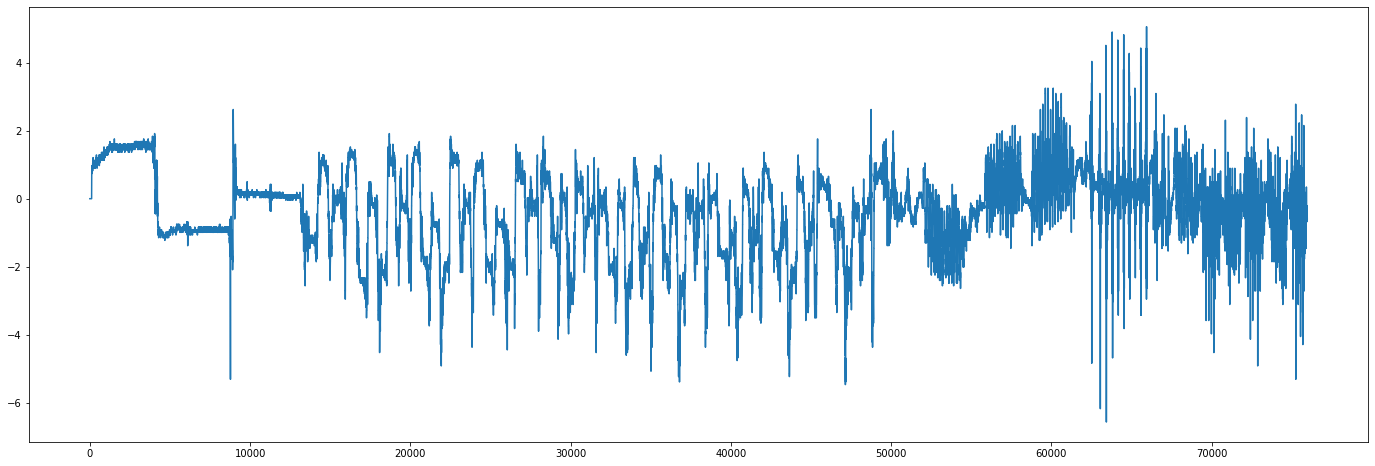

In [5]:
plt.figure(figsize=(8 * 3, 8))
plt.plot(df.accelerometer_x)

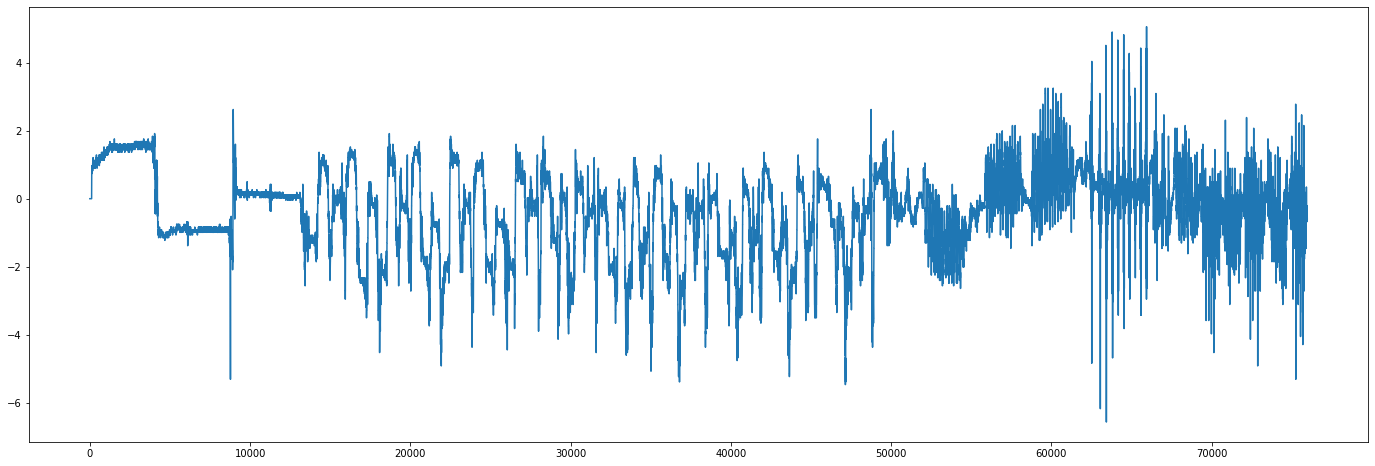

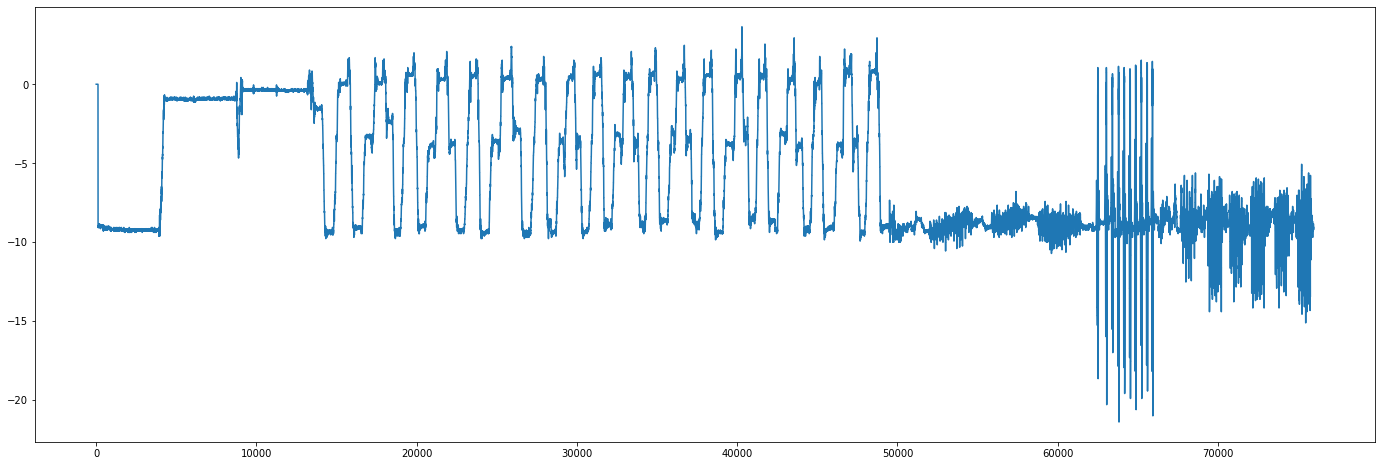

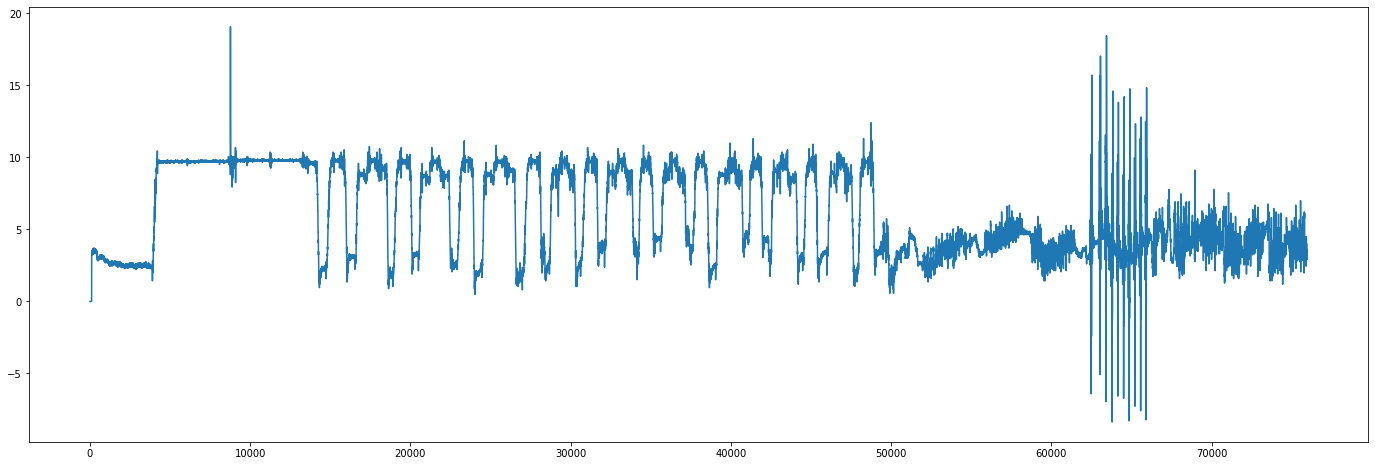

In [6]:
df.index.name = 'time'
_df = df.reset_index()
plt.figure(figsize=(8 * 3, 8))
plt.plot(_df.accelerometer_x)
plt.show()

plt.figure(figsize=(8 * 3, 8))
plt.plot(_df.accelerometer_y)
plt.show()

plt.figure(figsize=(8 * 3, 8))
plt.plot(_df.accelerometer_z)
plt.show()

In [7]:
# 30 Detik = 1 Frame
# 1. Stand
# 2. Sit
# 3. Sleep
# 4. Sit
# 5. Stand
# 6. Sleep
# 7. Stand

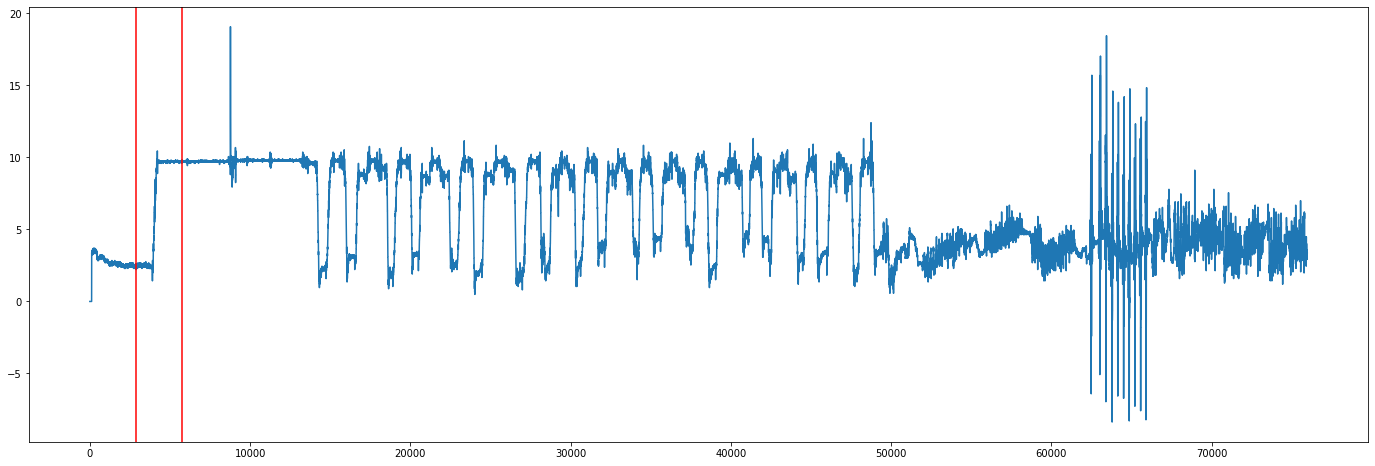

In [8]:
plt.figure(figsize=(8 * 3, 8))
plt.plot(_df.accelerometer_z)
plt.axvline(x=24 * 120, color='r')
plt.axvline(x=48 * 120, color='r')
plt.show()

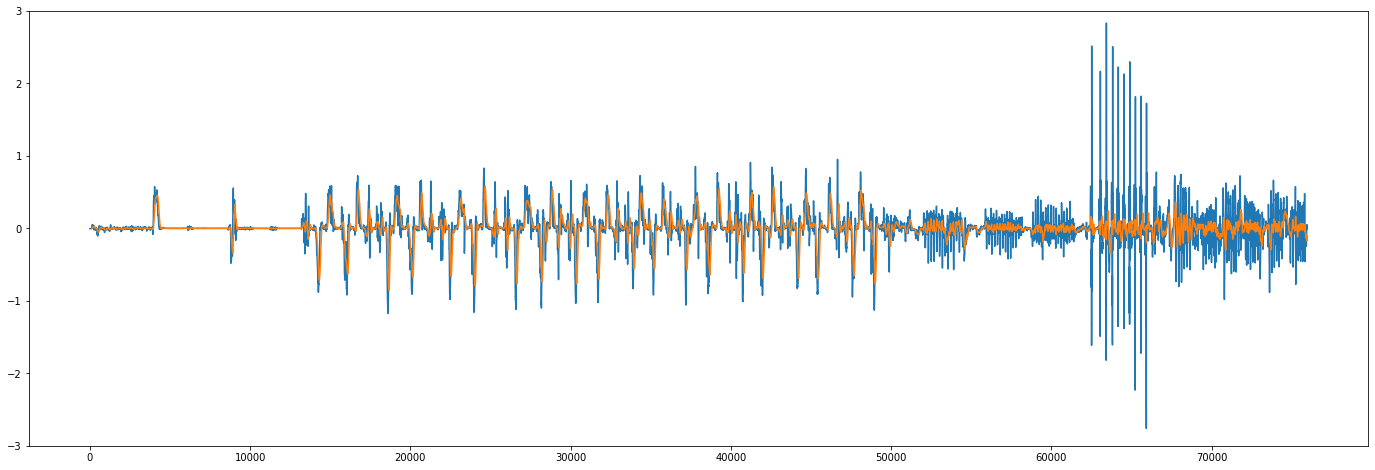

In [89]:
plt.figure(figsize=(8 * 3, 8))

plt.plot(_df.gyroscope_x)
data = _df.gyroscope_x
# smoothen data by calculating moving mean
data = data.rolling(window=128).mean()

# df = pd.DataFrame(columns=["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"])
# df["acc_x"] = data
# df["acc_y"] = data

plt.ylim(-3,3)
plt.plot(data)
plt.show()

In [90]:
aa = []
# **120** data dalam 1 detik seng mbok ambil 1 setiap 60 data
# 1 detik diwalikli 2 data
for i in range(0, data.shape[0], 60):
    aa.append(data[i])
np.array(aa).shape

(1267,)

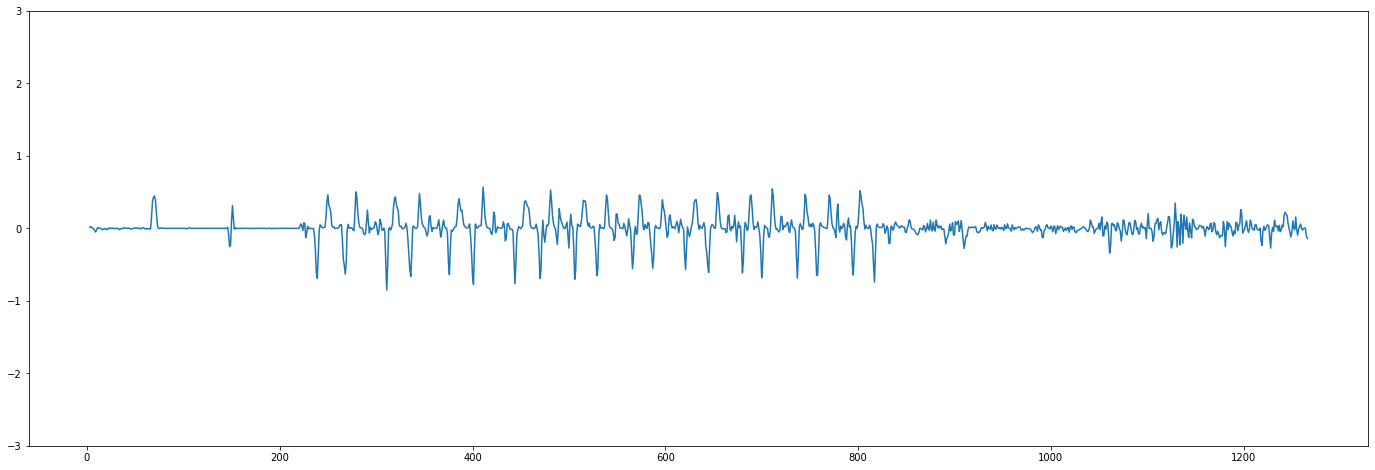

In [91]:
plt.figure(figsize=(8 * 3, 8))
plt.ylim(-3,3)
plt.plot(np.array(aa))

In [64]:
df = pd.DataFrame(data)
df.to_csv("Test.csv")

In [10]:
# LSTM - Bidirectional - Tensorflow

# CNN
# RNN
# RCNN
# LSTM
# GRU
# Transformers
# Multi-Head Attention

In [15]:
# create window dataset

def create_window_dataset(data, window_size, step_size):
    _data = data.accelerometer_z
    X = []
    y = []
    for i in range(0, len(data) - window_size, step_size):
        X.append(_data[i: i + window_size])
        y.append(data.state[i + window_size])
    return np.array(X), np.array(y)


windowed_data = create_window_dataset(df[0:10000], 120 * 24, 1)

In [48]:
windowed_x, windowed_y = windowed_data

dict_map = {
    'SIT': 0,
    'SIT2SLEEP': 1,
    'SLEEP': 2,
    'STAND': 3,
    'STAND2SIT': 4,
}

windowed_y = [dict_map[i] for i in windowed_y]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

0

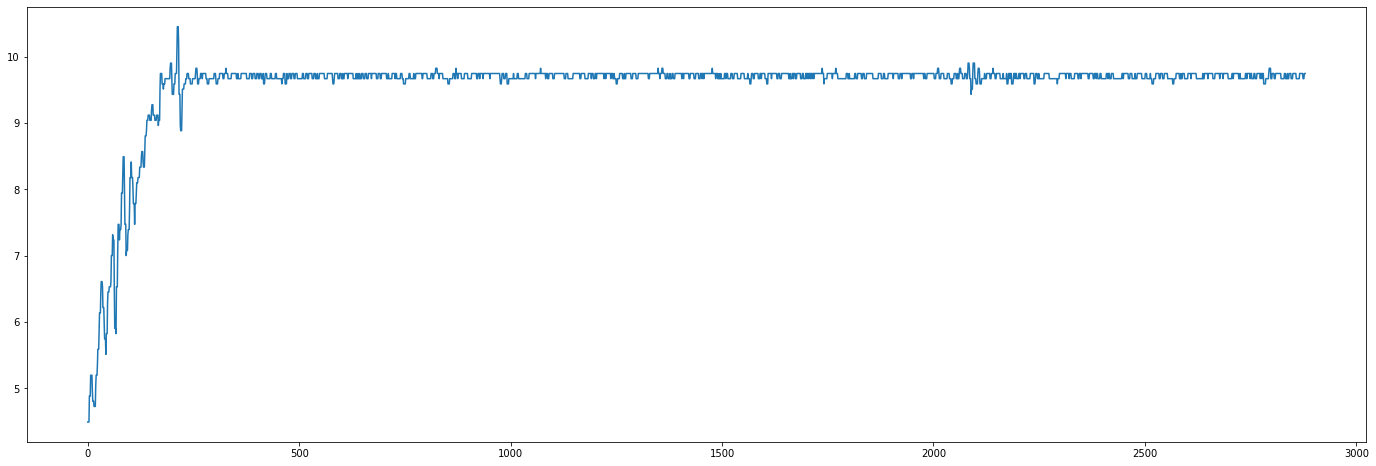

In [51]:
windowed_x, windowed_y = np.array(windowed_x), np.array(windowed_y)
plt.figure(figsize=(8 * 3, 8))
plt.plot(windowed_x[4000])
windowed_y[4000]

In [50]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(128, input_shape=(120 * 24, 1)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(windowed_x, windowed_y, epochs=10, batch_size=32)
# Datasize/Batch 6 * (**120** * 24) * 32 = 552,960
# 1/5 == 20%
# 1/15 == 6%

# 78% model A
# 50% model B

# 60 Data / Sec
# Target = 5 Data / Sec

# 12 Data mean x mean y mean z mean acc x mean acc y mean acc z
# 60 -> 5

Epoch 1/10
223/223 [==============================] - 616s 3s/step - loss: 0.0000e+00 - accuracy: 0.5188
Epoch 2/10
223/223 [==============================] - 663s 3s/step - loss: 0.0000e+00 - accuracy: 0.6027
Epoch 3/10
223/223 [==============================] - 667s 3s/step - loss: 0.0000e+00 - accuracy: 0.6150
Epoch 4/10
223/223 [==============================] - 630s 3s/step - loss: 0.0000e+00 - accuracy: 0.5576
Epoch 5/10
 15/223 [=>............................] - ETA: 9:32 - loss: 0.0000e+00 - accuracy: 0.3562

KeyboardInterrupt: 